In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandasql as ps
from datetime import date

# Data exploration
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv("loan_rev2.csv")
trans = pd.read_csv("trans_rev2.csv")
disp = pd.read_csv("disp_rev2.csv")
client = pd.read_csv("client_rev2.csv")
district = pd.read_csv("district_rev2.csv")

In [3]:
# Data Exploration
# 1 client will have 1 client id and 1 disp id. There are less accounts than clients (clients share the same account).
# only owners can issue permanent orders and ask for loan

In [4]:
trans.nunique()

trans_id      1048575
account_id       4500
date             2179
type                3
operation           5
amount          40236
balance        540033
k_symbol            8
bank               13
account          7665
dtype: int64

In [5]:
loans.nunique()

loan_id       682
account_id    682
date          559
amount        645
duration        5
payments      577
status          4
dtype: int64

In [6]:
disp.nunique()

disp_id       5369
client_id     5369
account_id    4500
type             2
dtype: int64

In [7]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [8]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [9]:
# Formatting the loan dataset
# Attaching the account_id to the loans table. account_id is extract ed from the disp table
# Splitting the date column
# Checking the type of the new date column - str
# Converting the new data column to be datetime format
# Checking the type of the new data column - timestamp
# Checking if there are clients that have taken up multiple loans (duplicates) - no duplicates-

In [10]:
loans.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,B
1,5316,1801,930711,165960,36,4610,A
2,6863,9188,930728,127080,60,2118,A
3,5325,1843,930803,105804,36,2939,A
4,7240,11013,930906,274740,60,4579,A


In [11]:
loans_rev = pd.merge(loans, disp[disp['type']=='OWNER'], on = 'account_id', how='inner')

In [12]:
loans_rev

,loan_id,account_id,date,amount,duration,payments,status,disp_id,client_id,type
0,5314,1787,930705,96396,12,8033,B,2166,2166,OWNER
1,5316,1801,930711,165960,36,4610,A,2181,2181,OWNER
2,6863,9188,930728,127080,60,2118,A,11006,11314,OWNER
3,5325,1843,930803,105804,36,2939,A,2235,2235,OWNER
4,7240,11013,930906,274740,60,4579,A,13231,13539,OWNER
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348,C,127,127,OWNER
678,5221,1284,981205,52512,12,4376,C,1554,1554,OWNER
679,6402,6922,981206,139488,24,5812,C,8356,8356,OWNER
680,5346,1928,981206,55632,24,2318,C,2342,2342,OWNER


In [13]:
type(loans_rev['date'].iloc[0])

numpy.int64

In [14]:
loans_rev['date'] = loans['date'].apply(str)

In [15]:
loans_rev['date'] = pd.to_datetime(loans_rev['date']) 

In [16]:
loans_rev

,loan_id,account_id,date,amount,duration,payments,status,disp_id,client_id,type
0,5314,1787,1993-07-05,96396,12,8033,B,2166,2166,OWNER
1,5316,1801,1993-07-11,165960,36,4610,A,2181,2181,OWNER
2,6863,9188,1993-07-28,127080,60,2118,A,11006,11314,OWNER
3,5325,1843,1993-08-03,105804,36,2939,A,2235,2235,OWNER
4,7240,11013,1993-09-06,274740,60,4579,A,13231,13539,OWNER
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,1998-12-05,352704,48,7348,C,127,127,OWNER
678,5221,1284,1998-12-05,52512,12,4376,C,1554,1554,OWNER
679,6402,6922,1998-12-06,139488,24,5812,C,8356,8356,OWNER
680,5346,1928,1998-12-06,55632,24,2318,C,2342,2342,OWNER


In [17]:
# Formatting the trans dataset to extract the bank balance as at loan date
# Convert date from int64 to str before converting to datetimestamp

In [18]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [19]:
trans.sort_values('date', ascending = False, inplace = True)

In [20]:
trans['date'] = trans['date'].apply(str)

In [21]:
type(trans['date'].iloc[0])

str

In [22]:
trans_rev = pd.merge(trans, disp, on = "account_id", how = 'inner')

In [23]:
trans_rev["date"] = pd.to_datetime(trans_rev["date"]) 

In [24]:
type(trans_rev['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
trans_rev.head()

,trans_id,account_id,date,type_x,operation,amount,balance,k_symbol,bank,account,disp_id,client_id,type_y
0,1110008,3789,1998-12-19,VYDAJ,VYBER,11100.0,33684.0,NaN,NaN,NaN,4569,4569,OWNER
1,1109971,3789,1998-12-19,VYBER,VYBER,4900.0,44784.0,NaN,NaN,NaN,4569,4569,OWNER
2,1109980,3789,1998-12-18,VYDAJ,VYBER,2100.0,49684.0,NaN,NaN,NaN,4569,4569,OWNER
3,1109946,3789,1998-12-09,VYDAJ,PREVOD NA UCET,11244.0,51784.0,SIPO,QR,43976020.0,4569,4569,OWNER
4,1109970,3789,1998-12-09,VYBER,VYBER,5790.0,63028.0,NaN,NaN,NaN,4569,4569,OWNER


In [26]:
# Extracting the latest bank balance as at loan date

In [27]:
trans_rev.sort_values('date', ascending = False, inplace = True)

In [28]:
trans_rev.head()

,trans_id,account_id,date,type_x,operation,amount,balance,k_symbol,bank,account,disp_id,client_id,type_y
0,1110008,3789,1998-12-19,VYDAJ,VYBER,11100.0,33684.0,NaN,NaN,NaN,4569,4569,OWNER
8282,897183,3056,1998-12-19,VYDAJ,VYBER,600.0,32856.3,NaN,NaN,NaN,3695,3695,OWNER
6907,1109169,3787,1998-12-19,VYDAJ,VYBER,2600.0,81497.4,NaN,NaN,NaN,4567,4567,OWNER
7319,554045,1886,1998-12-19,VYBER,VYBER,16997.0,49077.9,NaN,NaN,NaN,2288,2288,OWNER
1649,2347317,7745,1998-12-19,PRIJEM,VKLAD,4500.0,25398.7,NaN,NaN,NaN,9274,9582,OWNER


In [29]:
# loan balance is the bank balance as at loan date
sqlcode = '''
SELECT *
FROM (
    SELECT loans_rev.loan_id, loans_rev.account_id, loans_rev.disp_id, loans_rev.client_id, loans_rev.type, 
    loans_rev.date AS date1, loans_rev.amount, loans_rev.duration, loans_rev.payments, 
    loans_rev.status,trans_rev.balance AS bank_balance_at_loan, trans_rev.date AS date2
    FROM loans_rev
    INNER JOIN trans_rev ON loans_rev.disp_id=trans_rev.disp_id
    WHERE loans_rev.date >= trans_rev.date
    ORDER BY date2 DESC
)
GROUP BY disp_id
'''

bank_balance_at_loan = ps.sqldf(sqlcode,locals())
bank_balance_at_loan

,loan_id,account_id,disp_id,client_id,type,date1,amount,duration,payments,status,bank_balance_at_loan,date2
0,4959,2,2,2,OWNER,1994-01-05 00:00:00.000000,80952,24,3373,A,20574.6,1994-01-05 00:00:00.000000
1,4961,19,25,25,OWNER,1996-04-29 00:00:00.000000,30276,12,2523,B,15854.0,1996-04-10 00:00:00.000000
2,4962,25,31,31,OWNER,1997-12-08 00:00:00.000000,30276,12,2523,A,31457.9,1997-12-08 00:00:00.000000
3,4967,37,45,45,OWNER,1998-10-14 00:00:00.000000,318480,60,5308,D,16367.8,1998-10-12 00:00:00.000000
4,4968,38,46,46,OWNER,1998-04-19 00:00:00.000000,110736,48,2307,C,37416.7,1998-04-10 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
677,7294,11327,13615,13923,OWNER,1998-09-27 00:00:00.000000,39168,24,1632,C,62119.2,1998-09-13 00:00:00.000000
678,7295,11328,13616,13924,OWNER,1998-07-18 00:00:00.000000,280440,60,4674,C,26203.2,1998-07-18 00:00:00.000000
679,7304,11349,13647,13955,OWNER,1995-10-29 00:00:00.000000,419880,60,6998,C,24704.4,1995-10-23 00:00:00.000000
680,7305,11359,13660,13968,OWNER,1996-08-06 00:00:00.000000,54024,12,4502,A,21164.6,1996-08-06 00:00:00.000000


In [30]:
# Extracting latest bank balance of the client

In [31]:
trans_latest = trans_rev.drop_duplicates(subset=['client_id'])

In [32]:
trans_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 0 to 1253325
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trans_id    5369 non-null   int64         
 1   account_id  5369 non-null   int64         
 2   date        5369 non-null   datetime64[ns]
 3   type_x      5369 non-null   object        
 4   operation   5350 non-null   object        
 5   amount      5369 non-null   float64       
 6   balance     5369 non-null   float64       
 7   k_symbol    2018 non-null   object        
 8   bank        2285 non-null   object        
 9   account     2581 non-null   float64       
 10  disp_id     5369 non-null   int64         
 11  client_id   5369 non-null   int64         
 12  type_y      5369 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 587.2+ KB


In [33]:
trans_latest.head(5)

,trans_id,account_id,date,type_x,operation,amount,balance,k_symbol,bank,account,disp_id,client_id,type_y
0,1110008,3789,1998-12-19,VYDAJ,VYBER,11100.0,33684.0,NaN,NaN,NaN,4569,4569,OWNER
8282,897183,3056,1998-12-19,VYDAJ,VYBER,600.0,32856.3,NaN,NaN,NaN,3695,3695,OWNER
6907,1109169,3787,1998-12-19,VYDAJ,VYBER,2600.0,81497.4,NaN,NaN,NaN,4567,4567,OWNER
7319,554045,1886,1998-12-19,VYBER,VYBER,16997.0,49077.9,NaN,NaN,NaN,2288,2288,OWNER
1649,2347317,7745,1998-12-19,PRIJEM,VKLAD,4500.0,25398.7,NaN,NaN,NaN,9274,9582,OWNER


In [34]:
# Checking if the the bank balance for account_id 3789 is showing the latest bank balance
trans.loc[trans['account_id'] == 3789].head(5)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
1048574,1110008,3789,981219,VYDAJ,VYBER,11100.0,33684.0,NaN,NaN,NaN
1048572,1109971,3789,981219,VYBER,VYBER,4900.0,44784.0,NaN,NaN,NaN
1048223,1109980,3789,981218,VYDAJ,VYBER,2100.0,49684.0,NaN,NaN,NaN
1039419,1109946,3789,981209,VYDAJ,PREVOD NA UCET,11244.0,51784.0,SIPO,QR,43976020.0
1039421,1109970,3789,981209,VYBER,VYBER,5790.0,63028.0,NaN,NaN,NaN


In [35]:
# Extracting the gender and age from the client dataset

In [36]:
client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


In [37]:
def gender(x):
    y = str(x)[2:]
    if float(y) > 5000:
        return "Female"
    else:
        return "Male"

In [38]:
def birthdate(x):
    year = str(x)[0:2]
    x = str(x)[2:]    
    if float(x)> 5000:
        x = float(x)-5000
        x = int(x)
        return pd.to_datetime('19' +year + str(x).zfill(4))
    else:
        return pd.to_datetime('19' + year + x)

In [39]:
def age(birthdate):
    today = pd.to_datetime('1999' +'01' +'01')
    one_or_zero = ((today.month, today.day) < (birthdate.month, birthdate.day))
    year_difference = today.year - birthdate.year
    age = year_difference - one_or_zero
    
    return age

In [40]:
def age_categorization(age):
  if age <25:
    return 'YOUTH'
  elif age <36:
    return 'ADULT'
  elif age <61:
    return 'MIDDLE-AGE'
  else:
    return 'SENIOR'

In [41]:
client['gender'] = client['birth_number'].apply(gender)
client['birth_date'] = client['birth_number'].apply(birthdate)
client['age'] = client['birth_date'].apply(age)
client['age_categorization'] = client['age'].apply(age_categorization)

In [42]:
client

,client_id,birth_number,district_id,gender,birth_date,age,age_categorization
0,1,706213,18,Female,1970-12-13,28,ADULT
1,2,450204,1,Male,1945-02-04,53,MIDDLE-AGE
2,3,406009,1,Female,1940-10-09,58,MIDDLE-AGE
3,4,561201,5,Male,1956-12-01,42,MIDDLE-AGE
4,5,605703,5,Female,1960-07-03,38,MIDDLE-AGE
...,...,...,...,...,...,...,...
5364,13955,456030,1,Female,1945-10-30,53,MIDDLE-AGE
5365,13956,430406,1,Male,1943-04-06,55,MIDDLE-AGE
5366,13968,680413,61,Male,1968-04-13,30,ADULT
5367,13971,626019,67,Female,1962-10-19,36,MIDDLE-AGE


In [43]:
# Creating the final dataset

In [44]:
district = district.rename(columns={'A1' : 'district_id','A11':'average_salary'})

In [45]:
final = pd.merge(trans_latest[["client_id","disp_id","account_id","type_y","balance"]], client, on = "client_id", how = 'inner')

In [46]:
final = pd.merge(final, bank_balance_at_loan[['loan_id', 'date1', 'amount','duration', 'status','payments','client_id','bank_balance_at_loan']], on = 'client_id', how = 'outer')

In [47]:
final = pd.merge(final, district[['district_id', 'average_salary']], on = 'district_id', how = 'left')

In [48]:
final

,client_id,disp_id,account_id,type_y,balance,birth_number,district_id,gender,birth_date,age,age_categorization,loan_id,date1,amount,duration,status,payments,bank_balance_at_loan,average_salary
0,4569,4569,3789,OWNER,33684.0,715709,6,Female,1971-07-09,27,ADULT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8546
1,3695,3695,3056,OWNER,32856.3,341004,55,Male,1934-10-04,64,SENIOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8743
2,4567,4567,3787,OWNER,81497.4,370212,70,Male,1937-02-12,61,SENIOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10177
3,2288,2288,1886,OWNER,49077.9,575823,32,Female,1957-08-23,41,MIDDLE-AGE,5337.0,1996-07-31 00:00:00.000000,162468.0,36.0,C,4513.0,74950.4,9272
4,9582,9274,7745,OWNER,25398.7,425414,2,Female,1942-04-14,56,MIDDLE-AGE,6574.0,1997-12-20 00:00:00.000000,77544.0,36.0,C,2154.0,20750.2,8507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,551,551,459,OWNER,8100.0,765705,47,Female,1976-07-05,22,YOUTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9538
5365,2464,2464,2029,OWNER,8900.0,450901,30,Male,1945-09-01,53,MIDDLE-AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9650
5366,2086,2086,1720,OWNER,11400.0,546029,35,Female,1954-10-29,44,MIDDLE-AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8867
5367,957,957,799,OWNER,9348.3,416223,56,Female,1941-12-23,57,MIDDLE-AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8772


In [49]:
# Filter out disponent clients as they are unable to take up a loan
final = final[final["type_y"] == 'OWNER']

In [50]:
# Checking if the loan balances are all accounted for
final['bank_balance_at_loan'].count()

682

In [51]:
# Reformating the order and column names
order = ['client_id','disp_id','account_id','type_y','gender','birth_date','age','age_categorization','district_id','balance','loan_id','date1','amount','bank_balance_at_loan','duration','status','payments']
final = final[order]
final = final.rename(columns={'type_y' : 'type','date1':'date', 'loan_amount' : 'amount'})
final['date'] = pd.to_datetime(final['date'])
final

,client_id,disp_id,account_id,type,gender,birth_date,age,age_categorization,district_id,balance,loan_id,date,amount,bank_balance_at_loan,duration,status,payments
0,4569,4569,3789,OWNER,Female,1971-07-09,27,ADULT,6,33684.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,3695,3695,3056,OWNER,Male,1934-10-04,64,SENIOR,55,32856.3,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,4567,4567,3787,OWNER,Male,1937-02-12,61,SENIOR,70,81497.4,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,2288,2288,1886,OWNER,Female,1957-08-23,41,MIDDLE-AGE,32,49077.9,5337.0,1996-07-31,162468.0,74950.4,36.0,C,4513.0
4,9582,9274,7745,OWNER,Female,1942-04-14,56,MIDDLE-AGE,2,25398.7,6574.0,1997-12-20,77544.0,20750.2,36.0,C,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,2639,2639,2180,OWNER,Female,1950-03-04,48,MIDDLE-AGE,45,11300.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
5364,551,551,459,OWNER,Female,1976-07-05,22,YOUTH,47,8100.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
5365,2464,2464,2029,OWNER,Male,1945-09-01,53,MIDDLE-AGE,30,8900.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
5366,2086,2086,1720,OWNER,Female,1954-10-29,44,MIDDLE-AGE,35,11400.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [52]:
final['bank_balance_at_loan2'] = final['bank_balance_at_loan']
final.loc[final['bank_balance_at_loan2'].isnull(),'bank_balance_at_loan2'] = final['balance']

In [53]:
final['loan_taken'] = final['loan_id'].notnull().map({False:0 ,True:1})

In [54]:
final

,client_id,disp_id,account_id,type,gender,birth_date,age,age_categorization,district_id,balance,loan_id,date,amount,bank_balance_at_loan,duration,status,payments,bank_balance_at_loan2,loan_taken
0,4569,4569,3789,OWNER,Female,1971-07-09,27,ADULT,6,33684.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,33684.0,0
1,3695,3695,3056,OWNER,Male,1934-10-04,64,SENIOR,55,32856.3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,32856.3,0
2,4567,4567,3787,OWNER,Male,1937-02-12,61,SENIOR,70,81497.4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,81497.4,0
3,2288,2288,1886,OWNER,Female,1957-08-23,41,MIDDLE-AGE,32,49077.9,5337.0,1996-07-31,162468.0,74950.4,36.0,C,4513.0,74950.4,1
4,9582,9274,7745,OWNER,Female,1942-04-14,56,MIDDLE-AGE,2,25398.7,6574.0,1997-12-20,77544.0,20750.2,36.0,C,2154.0,20750.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,2639,2639,2180,OWNER,Female,1950-03-04,48,MIDDLE-AGE,45,11300.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,11300.0,0
5364,551,551,459,OWNER,Female,1976-07-05,22,YOUTH,47,8100.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,8100.0,0
5365,2464,2464,2029,OWNER,Male,1945-09-01,53,MIDDLE-AGE,30,8900.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,8900.0,0
5366,2086,2086,1720,OWNER,Female,1954-10-29,44,MIDDLE-AGE,35,11400.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,11400.0,0


<AxesSubplot:xlabel='duration', ylabel='count'>

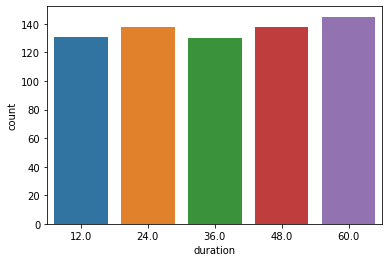

In [55]:
# Our loans are not skewed towards any duration. If the bank requires more liquidity, consider issuing less of loan term loans.
# Identify profitability of each duration segmeent to assess if we should change our mix of loans
# Short term loans tend to bear higher interest rates
sns.countplot(x='duration', data=final)

<AxesSubplot:xlabel='status', ylabel='count'>

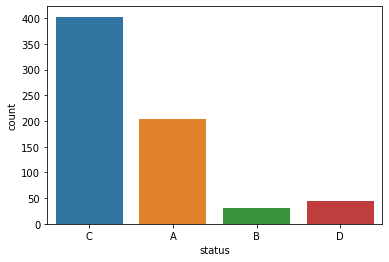

In [56]:
# Majority of our loans are healthy
# A: Contract finished, no issues
# B: Contract finished, loans no paid
# C: Running contract, no issues
# D: Running contract, client in debt
sns.countplot(x='status', data=final)

Text(0, 0.5, 'Bank balance during loan')

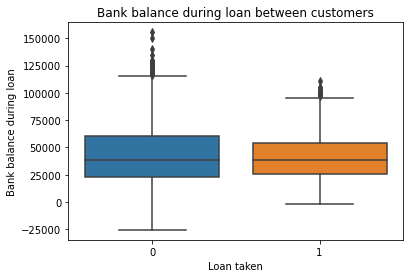

In [57]:
# From the boxplot below we can infer that the customers that have taken a loan generally have a lower bank balance. The top 10% of our customers is unlikely to take up our loans
# There are people with 0 bank balance that have taken a loan with us. Possibility to convert them to to our deposit customers.
ax = sns.boxplot(x='loan_taken', y='bank_balance_at_loan2', data=final)
plt.title('Bank balance during loan between customers')
plt.xlabel('Loan taken')
plt.ylabel('Bank balance during loan')

In [58]:
# The boxplot shows that there are customers with negative bank balances indicating overdrafts.
NegativeBalance = final[final['balance'] < 0]
NegativeBalance.info()
NegativeBalance

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 191 to 5328
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   client_id              38 non-null     int64         
 1   disp_id                38 non-null     int64         
 2   account_id             38 non-null     int64         
 3   type                   38 non-null     object        
 4   gender                 38 non-null     object        
 5   birth_date             38 non-null     datetime64[ns]
 6   age                    38 non-null     int64         
 7   age_categorization     38 non-null     object        
 8   district_id            38 non-null     int64         
 9   balance                38 non-null     float64       
 10  loan_id                9 non-null      float64       
 11  date                   9 non-null      datetime64[ns]
 12  amount                 9 non-null      float64       
 13  ban

,client_id,disp_id,account_id,type,gender,birth_date,age,age_categorization,district_id,balance,loan_id,date,amount,bank_balance_at_loan,duration,status,payments,bank_balance_at_loan2,loan_taken
191,10960,10652,8896,OWNER,Male,1942-02-20,56,MIDDLE-AGE,28,-2931.2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-2931.2,0
223,3760,3760,3109,OWNER,Male,1955-01-04,43,MIDDLE-AGE,18,-4259.8,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-4259.8,0
861,2532,2532,2089,OWNER,Male,1937-05-09,61,SENIOR,29,-1820.9,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-1820.9,0
869,1023,1023,849,OWNER,Male,1938-12-28,60,MIDDLE-AGE,1,-399.8,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-399.8,0
1120,5530,5530,4588,OWNER,Male,1953-03-29,45,MIDDLE-AGE,12,-684.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-684.0,0
1321,2291,2291,1888,OWNER,Male,1957-09-19,41,MIDDLE-AGE,6,-3369.8,5338.0,1997-08-30,57360.0,15016.3,12.0,B,4780.0,15016.3,1
2268,9313,9005,7520,OWNER,Female,1960-04-17,38,MIDDLE-AGE,9,-10823.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-10823.0,0
2302,2835,2835,2346,OWNER,Male,1966-01-27,32,ADULT,27,-2237.9,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-2237.9,0
2535,609,609,507,OWNER,Male,1962-09-02,36,MIDDLE-AGE,52,-9057.1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-9057.1,0
2663,1717,1717,1416,OWNER,Female,1979-03-07,19,YOUTH,73,-6746.2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-6746.2,0


In [59]:
# No correlation between bank balance and loan amount taken up
final[['amount','bank_balance_at_loan']].corr()

,amount,bank_balance_at_loan
amount,1.00000,0.01484
bank_balance_at_loan,0.01484,1.00000


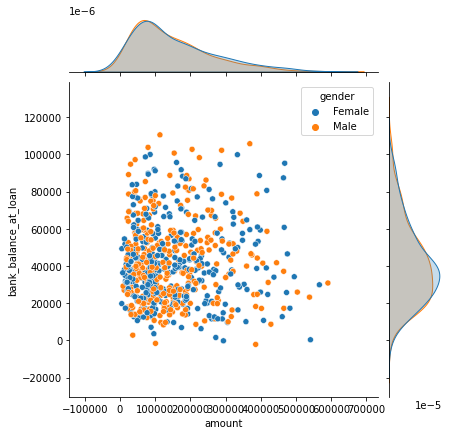

In [60]:
sns.jointplot(x='amount',y='bank_balance_at_loan',data=final, hue='gender')

Text(0.5, 0, 'loan amount')

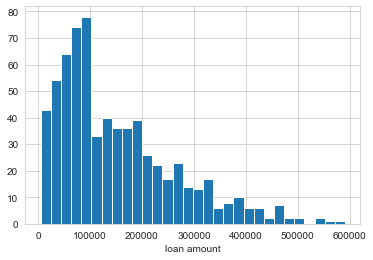

In [61]:
sns.set_style('whitegrid')
final['amount'].hist(bins=30)
plt.xlabel('loan amount')

Text(0.5, 0, 'age')

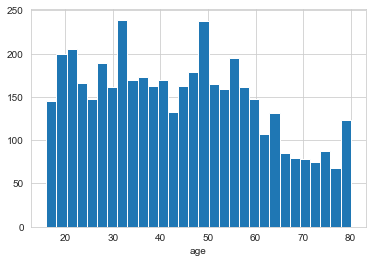

In [62]:
sns.set_style('whitegrid')
final['age'].hist(bins=30)
plt.xlabel('age')

In [63]:
final.to_csv('final.csv', index=False)

In [64]:
final

,client_id,disp_id,account_id,type,gender,birth_date,age,age_categorization,district_id,balance,loan_id,date,amount,bank_balance_at_loan,duration,status,payments,bank_balance_at_loan2,loan_taken
0,4569,4569,3789,OWNER,Female,1971-07-09,27,ADULT,6,33684.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,33684.0,0
1,3695,3695,3056,OWNER,Male,1934-10-04,64,SENIOR,55,32856.3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,32856.3,0
2,4567,4567,3787,OWNER,Male,1937-02-12,61,SENIOR,70,81497.4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,81497.4,0
3,2288,2288,1886,OWNER,Female,1957-08-23,41,MIDDLE-AGE,32,49077.9,5337.0,1996-07-31,162468.0,74950.4,36.0,C,4513.0,74950.4,1
4,9582,9274,7745,OWNER,Female,1942-04-14,56,MIDDLE-AGE,2,25398.7,6574.0,1997-12-20,77544.0,20750.2,36.0,C,2154.0,20750.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,2639,2639,2180,OWNER,Female,1950-03-04,48,MIDDLE-AGE,45,11300.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,11300.0,0
5364,551,551,459,OWNER,Female,1976-07-05,22,YOUTH,47,8100.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,8100.0,0
5365,2464,2464,2029,OWNER,Male,1945-09-01,53,MIDDLE-AGE,30,8900.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,8900.0,0
5366,2086,2086,1720,OWNER,Female,1954-10-29,44,MIDDLE-AGE,35,11400.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,11400.0,0
